In [1]:
# This script conducts analysis using a linear regression model.
# Access to the preprocessed data csv (preprocessed_data.csv) is required for running this script.

In [27]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statistics as stat

In [3]:
# load in clean data
data = pd.read_csv('preprocessed_data.csv')

In [4]:
# drop some of the rows that just categorize the states
drop_list = ['Middle Atlantic', 'East North Central', 'West North Central', 'South Atlantic', 'East South Central', 
             'West South Central', 'Mountain', 'Pacific Contiguous', 'Pacific Noncontiguous']

mask = ~data['State'].isin(drop_list)
filtered_data = data[mask]

In [5]:
# cutting hawaii and alaska as outliers
drop_states = ['Hawaii', 'Alaska']

mask = ~filtered_data['State'].isin(drop_list)
test_data = filtered_data[mask]

In [ ]:
year_list  = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
 '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']

# making a Contiguous US average row to use
# making a list of the average values 
av_dict = {'State': 'Cont United States'}
for year in year_list:
    av_dict.update({year : [np.nanmean(filtered_data[year].tolist())]})

cont_us_row = pd.DataFrame.from_dict(av_dict)

# adding the new row to the data frame
filtered_data = pd.concat([filtered_data, cont_us_row], ignore_index= True )

In [9]:
# pulling out the years 2022-2025
predict_yrs = filtered_data[['State', '2022', '2023', '2024', '2025']]

In [11]:
# making a dataframe without 2022-2025
drop_cols = ['2022', '2023', '2024', '2025']
test_data = filtered_data.drop(drop_cols, axis = 1)

In [12]:
# make a training and testing sets 
year_2000 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

x_train, x_test, y_train, y_test = train_test_split(year_2000, test_data.iloc[-1].tolist()[1:], test_size = 0.2)

In [13]:
# establish our linear regression model
model = LinearRegression()

In [14]:
# reshape our x data since we need it to be 2D for the model
x_train1 = np.array(x_train).reshape(-1, 1)
x_test1 = np.array(x_test).reshape(-1, 1)

In [15]:
# conduct the model fit
reg = model.fit(x_train1, y_train)

In [ ]:
# predict the values for 2022-25
x_data = [22, 23, 24, 25]
x_data= np.array(x_data).reshape(-1, 1)
predict_est = reg.predict(x_data)

In [20]:
print(predict_yrs.iloc[-1].tolist()[1:])

[np.float64(16.21874214), np.float64(17.30165094), np.float64(17.64446541), np.float64(18.27070081)]


In [ ]:
# calculating mse and percent error 
real_y = predict_yrs.iloc[-1].tolist()[1:]
diff_list = [a - b for a, b in zip(real_y, predict_est)]
mse = stat.mean(diff_list)
per_error = [ (a * 100) / b for a, b in zip(diff_list, real_y)]
print(per_error, mse)


[np.float64(4.848407403002516), np.float64(8.997191057178052), np.float64(8.993642599943406), np.float64(10.402001948026196)] 1.457603024381942


Text(0.5, 1.0, 'Linear Regression on Average Energy Cost in the Continental US')

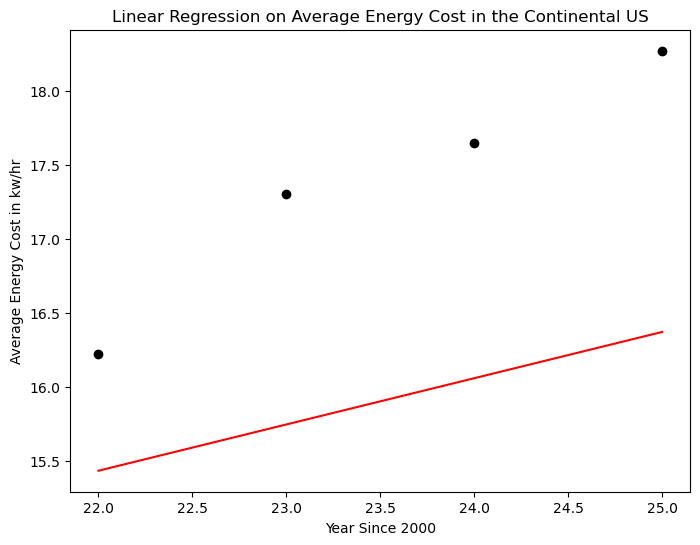

In [24]:
# plotting our predicted values with their actual values 
# plt the linear regression with the original data 
plt.figure(figsize = (8, 6))
plt.scatter([22, 23, 24, 25], real_y, color = 'black', label = 'True Cost')
plt.plot([22, 23, 24, 25], predict_est, color = 'red', label = 'Predicted Value')
plt.xlabel('Year Since 2000')
plt.ylabel('Average Energy Cost in kw/hr')
plt.title('Linear Regression on Average Energy Cost in the Continental US')